In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Membaca Dataset
file_path = r"C:\Users\User\Data_Mahasiswa.csv"  # Pastikan path benar
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

# 2. Membersihkan Nama Kolom
df.columns = df.columns.str.strip()

# 3. Menghapus Kolom yang Tidak Relevan
irrelevant_columns = ["Email Address", "Nama Lengkap Mahasiswa", "NIM", "Program Studi Mahasiswa", "Angkatan Mahasiswa"]
df_cleaned = df.drop(columns=[col for col in irrelevant_columns if col in df.columns])

# 4. Mengisi Nilai Kosong (Kategori dengan Mode, Numerik dengan Median)
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == "object":
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])  # Tanpa inplace
    else:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())  # Tanpa inplace

# 5. Mengubah Kategori ke Numerik (Label Encoding)
label_encoders = {}
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == "object":
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col])
        label_encoders[col] = le

# 6. Memisahkan Fitur (X) dan Target (y)
X = df_cleaned.drop(columns=["Programming Skill"])
y = df_cleaned["Programming Skill"]

# 7. Membagi Data Menjadi Training dan Testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Membuat dan Melatih Model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Memprediksi dan Mengevaluasi Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 10. Menampilkan Hasil Evaluasi
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")



Mean Absolute Error (MAE): 11.50
Mean Squared Error (MSE): 184.38
R² Score: -0.0602


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Membersihkan Nama Kolom
df.columns = df.columns.str.strip()

# 2. Menghapus Kolom yang Tidak Relevan
irrelevant_columns = ["Email Address", "Nama Lengkap Mahasiswa", "NIM", "Program Studi Mahasiswa", "Angkatan Mahasiswa"]
df_cleaned = df.drop(columns=[col for col in irrelevant_columns if col in df.columns])

# 3. Mengisi Nilai Kosong (Kategori dengan Mode, Numerik dengan Median)
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == "object":
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])  # Mengisi kategori dengan nilai terbanyak
    else:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())  # Mengisi numerik dengan median

# 4. Mengubah Kategori ke Numerik (Label Encoding)
label_encoders = {}
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == "object":
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col])
        label_encoders[col] = le

# 5. Memisahkan Fitur (X) dan Target (y)
X = df_cleaned.drop(columns=["Programming Skill"])
y = df_cleaned["Programming Skill"]

# 6. Membagi Data Menjadi Training dan Testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Membuat dan Melatih Model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Memprediksi dan Mengevaluasi Model
y_pred = model.predict(X_test)

# 9. Menyimpan Hasil Evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(mae, mse, r2)

(11.496568627450978, 184.38425196078427, -0.06018267416881584)

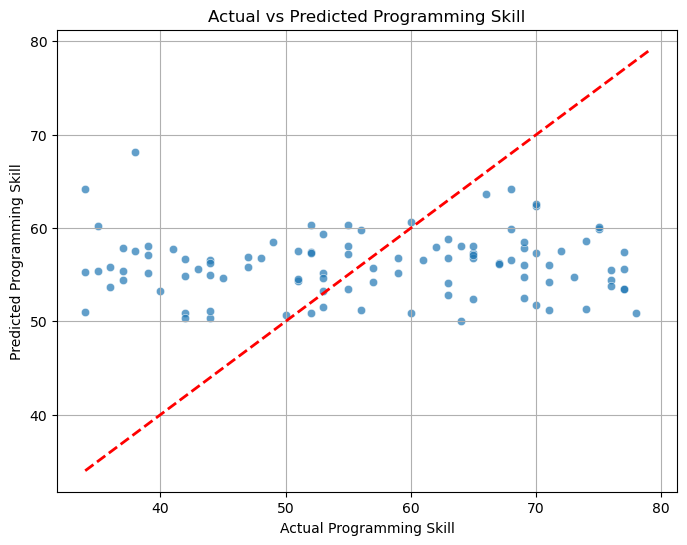

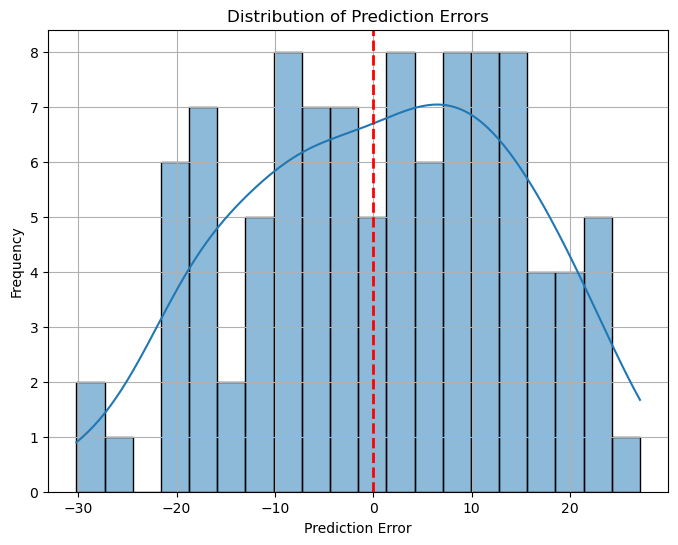

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plot: Nilai Sebenarnya vs Prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Garis ideal prediksi sempurna
plt.xlabel("Actual Programming Skill")
plt.ylabel("Predicted Programming Skill")
plt.title("Actual vs Predicted Programming Skill")
plt.grid(True)
plt.show()

# 2. Histogram Error (Selisih Prediksi dan Nilai Sebenarnya)
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=20, kde=True)
plt.axvline(x=0, color='r', linestyle='--', lw=2)  # Garis nol (tanpa error)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()

